## Loading Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('./data_clear.csv')
data = df['texts'].values.astype('U')
label = df['label'].values

In [ ]:
len(data)

30000

In [ ]:
data[0]

'forma digitalmente assinado documento juiz novembro intime cite conciliação audiência consoante constante formulado defiro exposto acima promovente pleito necessário assim fica ser deve obrigação portanto objeto endereço consta contrato proferida vista tendo autor pretensão acolhimento merece cpc prevista artigo dispõe conforme mérito resolução extinção casos magistrado civil código novo possibilidade ante pedido apenas inicialmente desta motivo sendo nova município demanda deu juízo feito eis material erro existência síntese alegando contra id declaração embargos etc vistos sentença sa ré autora cep rua comarca cível especial juizado estado judiciário poder'

In [ ]:
treino, teste, treino_y, teste_y = train_test_split(data, label, test_size=0.2, shuffle=True, random_state=0)

## Make TFidf transformer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_transformer = TfidfVectorizer()
X_train_tfidf = tfidf_transformer.fit_transform(treino)
X_test_tfidf = tfidf_transformer.transform(teste)

In [ ]:
X_train_tfidf.shape

(24000, 851)

## Train model of Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time
clf = RandomForestClassifier(criterion='entropy', max_depth = 20)
ini_rf = time.time()
clf.fit(X_train_tfidf, treino_y)
fim_rf = time.time()
pred = clf.predict(X_test_tfidf)
pre_rf = time.time()
treino_rf = fim_rf - ini_rf
time_prev_rf = pre_rf - fim_rf

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(teste_y, pred))

[[563   0   0   4   1   0   3  10   8   0]
 [  4 585  34   5   1   1   1   0   0   1]
 [  0  38 538   1   1   0   0   0   0   0]
 [  8   7   1 546  12   1   1   2   0   2]
 [  1   7   7   9 604   0   0   6   0   0]
 [  0   1   1   0   0 554   0   3   0  30]
 [  4   0   0   1   0   0 568  16   1   1]
 [  7   1   0   5   8   3  14 550   2   0]
 [  4   0   0   0   0   0   1   4 623   0]
 [  0   0   0   0   0  12   0   2   0 571]]


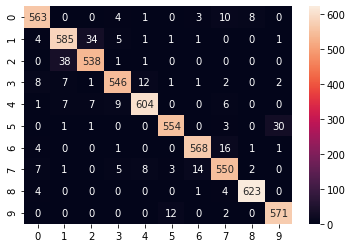

In [ ]:
import seaborn as sns
ax = sns.heatmap(confusion_matrix(teste_y, pred), annot=True, fmt="d")

In [ ]:
print(classification_report(teste_y, pred))

              precision    recall  f1-score   support

         196       0.95      0.96      0.95       589
         198       0.92      0.93      0.92       632
         200       0.93      0.93      0.93       578
         219       0.96      0.94      0.95       580
         220       0.96      0.95      0.96       634
         339       0.97      0.94      0.96       589
         458       0.97      0.96      0.96       591
         461       0.93      0.93      0.93       590
         463       0.98      0.99      0.98       632
         785       0.94      0.98      0.96       585

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000



## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf_nb = MultinomialNB()

ini_nb = time.time()
clf_nb.fit(X_train_tfidf, treino_y)
fim_nb = time.time()
pred_nb = clf_nb.predict(X_test_tfidf)
pre_nb = time.time()
treino_nb = fim_nb - ini_nb
time_prev_nb = pre_nb - fim_nb


In [ ]:
print(confusion_matrix(teste_y, pred_nb))

[[488  18   0   2   2   0  40  19  20   0]
 [  1 513  88  15   8   0   3   2   2   0]
 [  0  67 505   1   4   1   0   0   0   0]
 [  7  17   0 521  15   6   2   5   7   0]
 [  3  18  10  36 560   1   2   2   2   0]
 [  4   8   3   3   1 537   2   6   1  24]
 [  5   2   0   1   0   0 554  16  13   0]
 [  5   3   3  10  66   0  69 411  23   0]
 [  1   0   0   4   1   0   4  23 599   0]
 [  1   0   2   2   0  47   1   2   5 525]]


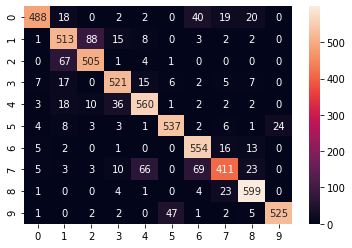

In [ ]:
ax = sns.heatmap(confusion_matrix(teste_y, pred_nb), annot=True, fmt="d")

In [ ]:
print(classification_report(teste_y, pred_nb))

              precision    recall  f1-score   support

         196       0.95      0.83      0.88       589
         198       0.79      0.81      0.80       632
         200       0.83      0.87      0.85       578
         219       0.88      0.90      0.89       580
         220       0.85      0.88      0.87       634
         339       0.91      0.91      0.91       589
         458       0.82      0.94      0.87       591
         461       0.85      0.70      0.76       590
         463       0.89      0.95      0.92       632
         785       0.96      0.90      0.93       585

    accuracy                           0.87      6000
   macro avg       0.87      0.87      0.87      6000
weighted avg       0.87      0.87      0.87      6000



## Adaboost

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth = 20)
clf_ada_tree = AdaBoostClassifier(clf_tree)
ini_ada_tree = time.time()
clf_ada_tree.fit(X_train_tfidf, treino_y)
fim_ada_tree = time.time()
pred_ada_tree = clf_ada_tree.predict(X_test_tfidf)
pre_ada_tree = time.time()
treino_ada_tree = fim_ada_tree - ini_ada_tree
time_prev_ada_tree = pre_ada_tree - fim_ada_tree


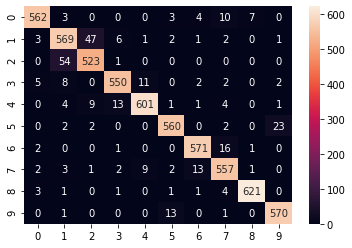

In [ ]:
ax = sns.heatmap(confusion_matrix(teste_y, pred_ada_tree), annot=True, fmt="d")

In [ ]:
print(confusion_matrix(teste_y, pred_ada_tree))

[[562   3   0   0   0   3   4  10   7   0]
 [  3 569  47   6   1   2   1   2   0   1]
 [  0  54 523   1   0   0   0   0   0   0]
 [  5   8   0 550  11   0   2   2   0   2]
 [  0   4   9  13 601   1   1   4   0   1]
 [  0   2   2   0   0 560   0   2   0  23]
 [  2   0   0   1   0   0 571  16   1   0]
 [  2   3   1   2   9   2  13 557   1   0]
 [  3   1   0   1   0   1   1   4 621   0]
 [  0   1   0   0   0  13   0   1   0 570]]


In [ ]:
print(classification_report(teste_y, pred_ada_tree))

              precision    recall  f1-score   support

         196       0.97      0.95      0.96       589
         198       0.88      0.90      0.89       632
         200       0.90      0.90      0.90       578
         219       0.96      0.95      0.95       580
         220       0.97      0.95      0.96       634
         339       0.96      0.95      0.96       589
         458       0.96      0.97      0.96       591
         461       0.93      0.94      0.94       590
         463       0.99      0.98      0.98       632
         785       0.95      0.97      0.96       585

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000



In [ ]:
clf_ada_tree.get_params(deep=True)

{'algorithm': 'SAMME.R',
 'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=20, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'entropy',
 'base_estimator__max_depth': 20,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': 'deprecated',
 'base_estimator__random_sta

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors = 5)
ini_knn = time.time()
clf_knn.fit(X_train_tfidf, treino_y)
fim_knn = time.time()
pred_knn = clf_knn.predict(X_test_tfidf)
pre_knn = time.time()
treino_knn = fim_knn - ini_knn
time_prev_knn = pre_knn - fim_knn

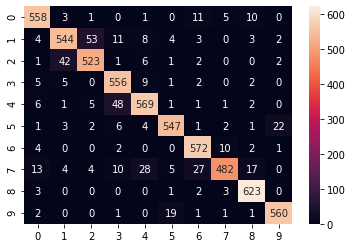

In [ ]:
ax = sns.heatmap(confusion_matrix(teste_y, pred_knn), annot=True, fmt="d")

In [ ]:
print(confusion_matrix(teste_y, pred_knn))

[[558   3   1   0   1   0  11   5  10   0]
 [  4 544  53  11   8   4   3   0   3   2]
 [  1  42 523   1   6   1   2   0   0   2]
 [  5   5   0 556   9   1   2   0   2   0]
 [  6   1   5  48 569   1   1   1   2   0]
 [  1   3   2   6   4 547   1   2   1  22]
 [  4   0   0   2   0   0 572  10   2   1]
 [ 13   4   4  10  28   5  27 482  17   0]
 [  3   0   0   0   0   1   2   3 623   0]
 [  2   0   0   1   0  19   1   1   1 560]]


In [ ]:
print(classification_report(teste_y, pred_knn))

              precision    recall  f1-score   support

         196       0.93      0.95      0.94       589
         198       0.90      0.86      0.88       632
         200       0.89      0.90      0.90       578
         219       0.88      0.96      0.92       580
         220       0.91      0.90      0.90       634
         339       0.94      0.93      0.94       589
         458       0.92      0.97      0.94       591
         461       0.96      0.82      0.88       590
         463       0.94      0.99      0.96       632
         785       0.95      0.96      0.96       585

    accuracy                           0.92      6000
   macro avg       0.92      0.92      0.92      6000
weighted avg       0.92      0.92      0.92      6000



## SVM

In [ ]:
from sklearn.svm import SVC
clf_svm = SVC()
ini_svm = time.time()
clf_svm.fit(X_train_tfidf, treino_y)
fim_svm = time.time()
pred_svm = clf_svm.predict(X_test_tfidf)
pre_svm = time.time()
treino_svm = fim_svm - ini_svm
time_prev_svm = pre_svm - fim_svm

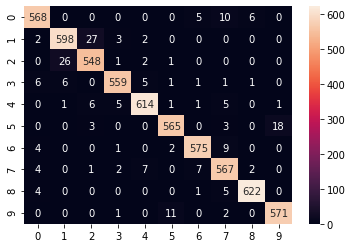

In [ ]:
ax = sns.heatmap(confusion_matrix(teste_y, pred_svm), annot=True, fmt="d")

In [ ]:
print(confusion_matrix(teste_y, pred_svm))

[[568   0   0   0   0   0   5  10   6   0]
 [  2 598  27   3   2   0   0   0   0   0]
 [  0  26 548   1   2   1   0   0   0   0]
 [  6   6   0 559   5   1   1   1   1   0]
 [  0   1   6   5 614   1   1   5   0   1]
 [  0   0   3   0   0 565   0   3   0  18]
 [  4   0   0   1   0   2 575   9   0   0]
 [  4   0   1   2   7   0   7 567   2   0]
 [  4   0   0   0   0   0   1   5 622   0]
 [  0   0   0   1   0  11   0   2   0 571]]


In [ ]:
print(classification_report(teste_y, pred_svm))

              precision    recall  f1-score   support

         196       0.97      0.96      0.97       589
         198       0.95      0.95      0.95       632
         200       0.94      0.95      0.94       578
         219       0.98      0.96      0.97       580
         220       0.97      0.97      0.97       634
         339       0.97      0.96      0.97       589
         458       0.97      0.97      0.97       591
         461       0.94      0.96      0.95       590
         463       0.99      0.98      0.98       632
         785       0.97      0.98      0.97       585

    accuracy                           0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000



## Learning with MLP

In [ ]:
mapping = {}
for x in range(len(np.unique(treino_y))):
    mapping[np.unique(treino_y)[x]] = x
print(mapping)

{196: 0, 198: 1, 200: 2, 219: 3, 220: 4, 339: 5, 458: 6, 461: 7, 463: 8, 785: 9}


In [ ]:
treino_mlp_y = []
teste_mlp_y = []
for x in range(len(treino_y)):
    treino_mlp_y.append(mapping[treino_y[x]])
for x in range(len(teste_y)):
    teste_mlp_y.append(mapping[teste_y[x]])
treino_mlp_y = np.array(treino_mlp_y)
teste_mlp_y = np.array(teste_mlp_y)

In [ ]:
import tensorflow

modelo = tensorflow.keras.Sequential()
#modelo.add(tensorflow.keras.layers.Embedding(input_dim=X_train_tfidf.shape[1]+1, output_dim=100))
modelo.add(tensorflow.keras.layers.Dense(X_train_tfidf.shape[1], activation='relu', dtype= 'float32', input_dim= X_train_tfidf.shape[1]))
modelo.add(tensorflow.keras.layers.Dense(400, activation='relu', dtype= 'float32'))
modelo.add(tensorflow.keras.layers.Dropout(rate=0.4, dtype= 'float32'))
modelo.add(tensorflow.keras.layers.Dense(160, activation='relu', dtype= 'float32'))
modelo.add(tensorflow.keras.layers.Dropout(rate=0.4, dtype= 'float32'))
modelo.add(tensorflow.keras.layers.Dense(120, activation='relu', dtype= 'float32'))
modelo.add(tensorflow.keras.layers.Dropout(rate=0.4, dtype= 'float32'))
modelo.add(tensorflow.keras.layers.Dense(60, activation='relu', dtype= 'float32'))
modelo.add(tensorflow.keras.layers.Dense(30, activation='relu', dtype= 'float32'))
modelo.add(tensorflow.keras.layers.Dense(len(mapping), activation='softmax', dtype= 'float32'))

adam = tensorflow.keras.optimizers.Adam(lr=0.002)
early_stopping = tensorflow.keras.callbacks.EarlyStopping(patience=4)
model_checkpoint = tensorflow.keras.callbacks.ModelCheckpoint(filepath = './cnn_embedding.h5', monitor='val_accuracy', save_best_only=True)

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(X_train_tfidf.toarray(), treino_mlp_y, 
                       batch_size = 40,
                       epochs=10, validation_split=0.2,
                       callbacks= [early_stopping, model_checkpoint])

Epoch 1/10
480/480 [==============================] - 8s 16ms/step - loss: 1.0141 - accuracy: 0.6224 - val_loss: 0.2419 - val_accuracy: 0.9360
Epoch 2/10
480/480 [==============================] - 7s 14ms/step - loss: 0.2145 - accuracy: 0.9449 - val_loss: 0.2113 - val_accuracy: 0.9496
Epoch 3/10
480/480 [==============================] - 7s 14ms/step - loss: 0.1533 - accuracy: 0.9648 - val_loss: 0.2257 - val_accuracy: 0.9506
Epoch 4/10
480/480 [==============================] - 7s 14ms/step - loss: 0.1266 - accuracy: 0.9696 - val_loss: 0.2262 - val_accuracy: 0.9531
Epoch 5/10
480/480 [==============================] - 7s 14ms/step - loss: 0.1062 - accuracy: 0.9751 - val_loss: 0.2532 - val_accuracy: 0.9506
Epoch 6/10
480/480 [==============================] - 7s 14ms/step - loss: 0.0842 - accuracy: 0.9807 - val_loss: 0.2602 - val_accuracy: 0.9485


In [ ]:
%%time
prev_mlp = np.argmax(modelo.predict(X_test_tfidf.toarray()), axis=1)

CPU times: user 1.09 s, sys: 56 ms, total: 1.15 s
Wall time: 799 ms


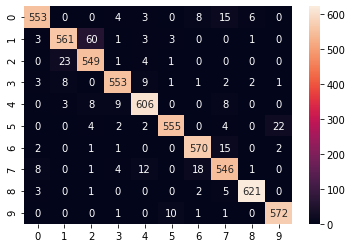

In [ ]:
ax = sns.heatmap(confusion_matrix(teste_mlp_y, prev_mlp), annot=True, fmt="d")

In [ ]:
print(confusion_matrix(teste_mlp_y, prev_mlp))

[[553   0   0   4   3   0   8  15   6   0]
 [  3 561  60   1   3   3   0   0   1   0]
 [  0  23 549   1   4   1   0   0   0   0]
 [  3   8   0 553   9   1   1   2   2   1]
 [  0   3   8   9 606   0   0   8   0   0]
 [  0   0   4   2   2 555   0   4   0  22]
 [  2   0   1   1   0   0 570  15   0   2]
 [  8   0   1   4  12   0  18 546   1   0]
 [  3   0   1   0   0   0   2   5 621   0]
 [  0   0   0   1   0  10   1   1   0 572]]


In [ ]:
print(classification_report(teste_mlp_y, prev_mlp))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       589
           1       0.94      0.89      0.91       632
           2       0.88      0.95      0.91       578
           3       0.96      0.95      0.96       580
           4       0.95      0.96      0.95       634
           5       0.97      0.94      0.96       589
           6       0.95      0.96      0.96       591
           7       0.92      0.93      0.92       590
           8       0.98      0.98      0.98       632
           9       0.96      0.98      0.97       585

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000



In [ ]:
print('Random Forest times: train: '+str(treino_rf)+ ' prediction: '+str(time_prev_rf))
print('KNN times: train: '+str(treino_knn)+ ' prediction: '+str(time_prev_knn))
print('Naive Bayes times: train: '+str(treino_nb)+ ' prediction: '+str(time_prev_nb))
print('Adaboost tree: times: train: '+str(treino_ada_tree)+ ' prediction: '+str(time_prev_ada_tree))
print('SVM times: train: '+str(treino_svm)+ ' prediction: '+str(time_prev_svm))

Random Forest times: train: 86.4323673248291 prediction: 0.24769353866577148
KNN times: train: 0.023966312408447266 prediction: 20.796252012252808
Naive Bayes times: train: 0.055977582931518555 prediction: 0.008681058883666992
Adaboost tree: times: train: 1437.0614805221558 prediction: 0.38110852241516113
SVM times: train: 231.9555778503418 prediction: 79.28628158569336
